In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
import numpy as np 
import pandas as pd 
from subprocess import check_output
import random
import cv2
import os
import glob
import pandas as pd
from skimage.feature import hog
from skimage.transform import resize
label = {}

In [11]:
def ExtractFeature(path, img_height, img_width):
    img = cv2.imread(path)
    imgfeature = resize(img,(img_height, img_width))
    fd, hog_image = hog(img, orientations=9, pixels_per_cell=(8, 8),cells_per_block=(2, 2), visualize=True, multichannel=True)
    img = img.reshape((img.shape[0],-1))
    img = cv2.resize(img, (img_height, img_width))
    fd = np.reshape(fd, (1,) + fd.shape)
    return fd, img

In [12]:
def get_data():
    train_dir = "./data/imgs/train/"
    y = []
    images = []
    count = -1
    
    for j in range(1):
        label[j]=count+1
        print('Load folder c{}'.format(j))
        path = os.path.join(train_dir, 'c' + str(j), '*.jpg')
        files = glob.glob(path)
        for img in files:
            count=count+1
            flbase = os.path.basename(img)
            feature, image = ExtractFeature(img,64,64)
            if count == 0:
                X = feature
            else:
                X = np.concatenate([X, feature])
            y.append(j)
            images.append(image)
    return X, y, images

In [13]:
X, y, imagedata = get_data()

Load folder c0


In [14]:
print(label)
print(y[label[0]])

{0: 0}
0


In [15]:
y = np.asarray(y)
imagedata = np.asarray(imagedata)
print(X.shape)
print(y.shape)
print(imagedata.shape)

(2489, 167796)
(2489,)
(2489, 64, 64)


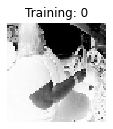

In [16]:
#plot the data, which is just the images flattened into a 1-d array
for i in range(0,1):
    plt.subplot(2, 1,i + 1)
    plt.axis('off')
    imside = int(imagedata[label[i]].shape[0])
    # im1 = np.reshape(X_train[i],(imside,imside))
    im1 = np.reshape(imagedata[label[i]],(imside,imside))
    plt.imshow(im1, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: {}'.format(y[label[i]]))
plt.show()

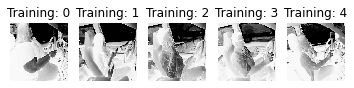

In [267]:
#the images are also included in the dataset as images
for i in range(0,5):
    plt.subplot(2, 5,i + 1)
    plt.axis('off')
    plt.imshow(imagedata[label[i]], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: {}'.format(y[label[i]]))
plt.show()

In [268]:
#from here we will be using the images. First we should flatten the images
n_samples = len(X)
data_images = X.reshape((n_samples, -1))
print(n_samples)
print(data_images.shape)

22424
(22424, 6400)


In [269]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_images, y, test_size=0.2, random_state=42)
print('Training data and target sizes: \n{}, {}'.format(X_train.shape,y_train.shape))
print('Test data and target sizes: \n{}, {}'.format(X_test.shape,y_test.shape))

Training data and target sizes: 
(17939, 6400), (17939,)
Test data and target sizes: 
(4485, 6400), (4485,)


In [270]:
# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma='scale',kernel='poly',max_iter=100, verbose=2)
#fit to the trainin data
classifier.fit(X_train,y_train)

SVC(kernel='poly', max_iter=100)

In [271]:
# now to Now predict the value of the digit on the test data
y_pred = classifier.predict(X_test)

In [274]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, y_pred)))

Classification report for classifier SVC(kernel='poly', max_iter=100):
              precision    recall  f1-score   support

           0       0.19      0.40      0.26       463
           1       0.21      0.25      0.23       500
           2       0.27      0.29      0.28       480
           3       0.28      0.24      0.26       491
           4       0.29      0.22      0.25       466
           5       0.28      0.22      0.25       466
           6       0.22      0.18      0.20       457
           7       0.16      0.11      0.13       377
           8       0.13      0.11      0.11       390
           9       0.22      0.18      0.20       395

    accuracy                           0.22      4485
   macro avg       0.23      0.22      0.22      4485
weighted avg       0.23      0.22      0.22      4485




In [275]:
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, y_pred))

Confusion matrix:
[[185  45  31  41  26  41  20  21  28  25]
 [ 83 125  40  46  21  22  47  35  46  35]
 [ 89  53 139  26  19  41  37  22  34  20]
 [ 74  85  21 117  39  27  21  28  32  47]
 [108  48  43  53 104  13  32  16  30  19]
 [ 86  65  53  25  16 102  42  21  28  28]
 [ 71  49  54  37  39  32  81  31  33  30]
 [ 91  34  54  19  21  33  26  43  27  29]
 [ 94  55  42  13  30  33  39  25  41  18]
 [ 83  39  38  38  38  16  25  23  25  70]]


In [276]:
print(classifier.score(X_test,y_test))

0.22452619843924193


(1, 6400)
[4]


Text(0.5, 1.0, 'Predict: [4]')

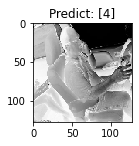

In [278]:
testpath = "./data/imgs/test/img_32.jpg"
plt.subplot(2, 1, 1)
img = glob.glob(testpath)
feature,img = ExtractFeature(img[0])
plt.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')
plt.title('Predict: {}'.format(y[label[i]]))
feature = feature.reshape((1,-1))
print(feature.shape)
pred = classifier.predict(feature)
print(pred)
plt.title('Predict: {}'.format(pred))
# flbase = os.path.basename(fl)
# img = resize(fl, 128, 128)
# X_train.append(img)

In [19]:
def get_datalabel():
    train_dir = "./data/imgs/test/"
    data = []
    path = os.path.join(train_dir, '*.jpg')
    files = glob.glob(path)
    for fl in files:
        flbase = os.path.basename(fl).split('.')[0]
        flbase = int(flbase.split('_')[1])
        data.append(flbase)
    return data

In [33]:
data = get_datalabel()
data.sort()
data = data[:3000]
data = ["img_" + str(img) + ".jpg" for img in data]
data = data[174:999]
print(data[0],data[-1])


img_221.jpg img_1298.jpg


In [35]:
Xt = []
for dat in data:
    source = "./data/imgs/test"
    path = os.path.join(source, dat)
    img = resize(path, 128, 128)
    Xt.append(img)
Xt = np.asarray(Xt)

In [37]:
print(Xt.shape)

(825, 128, 128)


In [39]:
n_samples = len(Xt)
Xtt = Xt.reshape((n_samples, -1))
print(Xtt.shape)

(825, 16384)


In [47]:
y_pred = classifier.predict(Xtt)

In [58]:
column_names = ["label"]
df = pd.DataFrame(y_pred,columns = column_names)
df.to_csv("./data/predLabel.csv", index=False)

In [65]:
data = pd.read_csv("./data/groundtruth.csv", sep=';') 
images = data["image"]
yt = data["label"]

In [281]:
count=0
for img in images:
    source = "./data/imgs/test"
    path = os.path.join(source, img)
    feature, img = ExtractFeature(path)
    if count == 0:
        Xt = feature
    else:
        Xt = np.concatenate([Xt, feature])
    count=1

In [282]:
Xt = np.asarray(Xt)
yt = np.asanyarray(yt)
print(Xt.shape)
print(yt.shape)

(1000, 200, 32)
(1000,)


In [283]:
n_samples = len(Xt)
Xtt = Xt.reshape((n_samples, -1))

In [284]:
y_pred = classifier.predict(Xtt)

In [285]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(yt, y_pred)))

Classification report for classifier SVC(kernel='poly', max_iter=100):
              precision    recall  f1-score   support

           0       0.19      0.31      0.24       131
           1       0.11      0.12      0.12       113
           2       0.09      0.11      0.10        91
           3       0.16      0.13      0.15       106
           4       0.14      0.09      0.11       107
           5       0.17      0.14      0.16       113
           6       0.15      0.11      0.13       107
           7       0.15      0.11      0.12       104
           8       0.11      0.12      0.12        80
           9       0.06      0.08      0.07        48

    accuracy                           0.14      1000
   macro avg       0.14      0.13      0.13      1000
weighted avg       0.14      0.14      0.14      1000




In [286]:
print("Confusion matrix:\n%s" % metrics.confusion_matrix(yt, y_pred))

Confusion matrix:
[[41 15 17 13  4 12 13  4  7  5]
 [27 14 18 10  7  3  9  9 11  5]
 [17 19 10  7  5  8  3 10  6  6]
 [22 12  9 14  8 13 10  6  3  9]
 [18 14 11 14 10  8  4 10  9  9]
 [23 14  9  5  6 16 10 12 10  8]
 [15 12 14  5 11 14 12  6 15  3]
 [21 11  9  5  6  9 12 11 12  8]
 [14  6 12  7 10  8  4  2 10  7]
 [13  7  3  6  7  1  1  2  4  4]]


In [287]:
print(classifier.score(Xtt,yt))

0.142


In [74]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# define scaler
scaler = MinMaxScaler()
# fit scaler on the training dataset
scaler.fit(X_train)
# transform the training dataset
X_train_scaled = scaler.transform(X_train)
print(X_train.shape)
print(X_train_scaled.shape)